<a href="https://colab.research.google.com/github/ismailkaya83/MY-DEEP-LEARNING-NOTEBOOKS/blob/master/Working%20with%20text%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with text data**

Like all other neural networks, deep-learning models don’t take as input raw text: they only work with numeric tensors. Vectorizing text is the process of transforming text into numeric tensors. This can be done in multiple ways:

- Segment text into words, and transform each word into a vector.
- Segment text into characters, and transform each character into a vector.
- Extract n-grams of words or characters, and transform each n-gram into a vector. N-grams are overlapping groups of multiple consecutive words or characters.

Collectively, the different units into which you can break down text (words, characters, or n-grams) are called **tokens**, and breaking text into such tokens is called **tokenization**.

## **One-hot encoding of words and characters**

One-hot encoding is the most common, most basic way to turn a token into a vector. It consists of associating a unique integer index with every word and then turning this integer index i into a binary vector of size N (the size of the vocabulary); the vector is all zeros except for the ith entry, which is 1.

Of course, one-hot encoding can be done at the character level, as well.

### **Word-level one-hot encoding**

In [16]:
#Word-level one-hot encoding (toy example) kelime seviyesinde kodlama

import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [17]:
token_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [18]:
max_length = 10 #her ornekte ilk 10 kelime dikkate alinacak

results = np.zeros(shape=(len(samples),
                          max_length, 
                          max(token_index.values()) +1)) # degerleri sakladiginiz yer

In [19]:
results.shape

(2, 10, 11)

In [20]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [21]:
for i, sample in enumerate(samples):
    print(i, sample)

0 The cat sat on the mat.
1 The dog ate my homework.


In [22]:
list(enumerate("The cat sat on the mat.".split()))[:max_length]

[(0, 'The'), (1, 'cat'), (2, 'sat'), (3, 'on'), (4, 'the'), (5, 'mat.')]

### **Character-level one-hot encoding**

In [23]:
# Character-level one-hot encoding (toy example) Karakter seviyesinde kodlama

import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

characters = string.printable # tum yazdirilabilir ASCII karakterler

token_index = dict(zip(range(1, len(characters) + 1), characters))

In [24]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [25]:
token_index

{1: '0',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9',
 11: 'a',
 12: 'b',
 13: 'c',
 14: 'd',
 15: 'e',
 16: 'f',
 17: 'g',
 18: 'h',
 19: 'i',
 20: 'j',
 21: 'k',
 22: 'l',
 23: 'm',
 24: 'n',
 25: 'o',
 26: 'p',
 27: 'q',
 28: 'r',
 29: 's',
 30: 't',
 31: 'u',
 32: 'v',
 33: 'w',
 34: 'x',
 35: 'y',
 36: 'z',
 37: 'A',
 38: 'B',
 39: 'C',
 40: 'D',
 41: 'E',
 42: 'F',
 43: 'G',
 44: 'H',
 45: 'I',
 46: 'J',
 47: 'K',
 48: 'L',
 49: 'M',
 50: 'N',
 51: 'O',
 52: 'P',
 53: 'Q',
 54: 'R',
 55: 'S',
 56: 'T',
 57: 'U',
 58: 'V',
 59: 'W',
 60: 'X',
 61: 'Y',
 62: 'Z',
 63: '!',
 64: '"',
 65: '#',
 66: '$',
 67: '%',
 68: '&',
 69: "'",
 70: '(',
 71: ')',
 72: '*',
 73: '+',
 74: ',',
 75: '-',
 76: '.',
 77: '/',
 78: ':',
 79: ';',
 80: '<',
 81: '=',
 82: '>',
 83: '?',
 84: '@',
 85: '[',
 86: '\\',
 87: ']',
 88: '^',
 89: '_',
 90: '`',
 91: '{',
 92: '|',
 93: '}',
 94: '~',
 95: ' ',
 96: '\t',
 97: '\n',
 98: '\r',
 99: '\x0b',
 100: '\x0c'

In [26]:
max_length = 50

results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

In [27]:
results.shape

(2, 50, 101)

In [28]:
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] =1.

In [29]:
results

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### **Using Keras for word-level one-hot encoding**

Note that Keras has built-in utilities for doing one-hot encoding of text at the word level or character level, starting from raw text data. You should use these utilities, because they take care of a number of important features such as stripping special characters from strings and only taking into account the N most common words in your dataset (a common restriction, to avoid dealing with very large input vector spaces).

In [30]:
# Using Keras for word-level one-hot encoding

from keras.preprocessing.text import Tokenizer

In [31]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) # 1000 yaygin kelime icin andic ayirici

In [32]:
tokenizer.fit_on_texts(samples) # kelime indeksleri olusturur.

In [33]:
sequences = tokenizer.texts_to_sequences(samples) # metinleri tam sayi listelerine donusturur.

In [34]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [35]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [36]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [37]:
word_index = tokenizer.word_index

In [38]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [39]:
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


### **Word-level one-hot encoding with hashing trick**

A variant of one-hot encoding is the so-called one-hot hashing trick, which you can use when the number of unique tokens in your vocabulary is too large to handle explicitly. Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, you can hash words into vectors of fixed size. This is typically done with a very lightweight hashing function. The main advantage of this method is that it does away with maintaining an explicit word index, which saves memory and allows online encoding of the data (you can generate token vectors right away, before you’ve seen all of the available data). The one drawback of this approach is that it’s susceptible to hash collisions: two different words may end up with the same hash, and subsequently any machine-learning model looking at these hashes won’t be able to tell the difference between these words. The likelihood of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.

In [40]:
#hash kodlama hilesi

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
#1000 kelimelik vektorler saklar. Eger 1000 den fazla veya yakin sayida kelimeniz varsa hash kodlama hatasi alabilirsiniz

max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

In [41]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index=abs(hash(word)) % dimensionality # kelimeyi 0 ile 1000 arasindaki rastgele bir tamsayiya hash kodlar
        
        results[i, j, index] = 1.

In [42]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

## **Using word embeddings**

Another popular and powerful way to associate a vector with a word is the use of dense word vectors, also called word embeddings. Whereas the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros), and very high-dimensional (same dimensionality as the number of words in the vocabulary), word embeddings are low-dimensional floating-point vectors (that is, dense vectors, as opposed to sparse vectors); see figure 6.2. Unlike the word vectors obtained via one-hot encoding, word embeddings are learned from data. It’s common to see word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large vocabularies. On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or greater (capturing a vocabulary of 20,000 tokens, in this case). So, word embeddings pack more information into far fewer dimensions.

There are two ways to obtain word embeddings:

- Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors in the same way you learn the weights of a neural network.
- Load into your model word embeddings that were precomputed using a different machine-learning task than the one you’re trying to solve. These are called pretrained word embeddings.

### **Learning word embeddings with the Embedding layer**

this approach is that the resulting embedding space has no structure: for instance, the words accurate and exact may end up with completely different embeddings, even though they’re interchangeable in most sentences. It’s difficult for a deep neural network to make sense of such a noisy, unstructured embedding space.

To get a bit more abstract, the geometric relationships between word vectors should reflect the semantic relationships between these words. Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, you would expect synonyms to be embedded into similar word vectors; and in general, you would expect the geometric distance (such as L2 distance) between any two word vectors to relate to the semantic distance between the associated words (words meaning different things are embedded at points far away from each other, whereas related words are closer). In addition to distance, you may want specific directions in the embedding space to be meaningful. To make this clearer, let’s look at a concrete example.

In figure 6.3, four words are embedded on a 2D plane: cat, dog, wolf, and tiger. With the vector representations we chose here, some semantic relationships between these words can be encoded as geometric transformations. For instance, the same vector allows us to go from cat to tiger and from dog to wolf: this vector could be interpreted as the “from pet to wild animal” vector. Similarly, another vector lets us go from dog to cat and from wolf to tiger, which could be interpreted as a “from canine to feline” vector.

In real-world word-embedding spaces, common examples of meaningful geometric transformations are “gender” vectors and “plural” vectors. For instance, by adding a “female” vector to the vector “king,” we obtain the vector “queen.” By adding a “plural” vector, we obtain “kings.” Word-embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some ideal word-embedding space that would perfectly map human language and could be used for any natural-language-processing task? Possibly, but we have yet to compute anything of the sort. Also, there is no such a thing as human language—there are many different languages, and they aren’t isomorphic, because a language is the reflection of a specific culture and a specific context. But more pragmatically, what makes a good word-embedding space depends heavily on your task: the perfect word-embedding space for an English-language movie-review sentiment-analysis model may look different from the perfect embedding space for an English-language legal--document-classification model, because the importance of certain semantic relationships varies from task to task.

It’s thus reasonable to learn a new embedding space with every new task. Fortunately, backpropagation makes this easy, and Keras makes it even easier. It’s about learning the weights of a layer: the Embedding layer.

In [99]:
# Instantiating an Embedding layer (embaddin katmani olusturmak)

from keras.layers import Embedding

embedding_layer = Embedding(1000, 64) 
#embedding katmani en azindan iki parametre alir: Maksimum andic sayisi ve gomulmenin boyutu

The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors.

The Embedding layer takes as input a 2D tensor of integers, of shape (samples, sequence_length), where each entry is a sequence of integers. It can embed sequences of variable lengths: for instance, you could feed into the Embedding layer in the previous example batches with shapes (32, 10) (batch of 32 sequences of length 10) or (64, 15) (batch of 64 sequences of length 15). All sequences in a batch must have the same length, though (because you need to pack them into a single tensor), so sequences that are shorter than others should be padded with zeros, and sequences that are longer should be truncated.

This layer returns a 3D floating-point tensor of shape (samples, sequence_length, embedding_dimensionality). Such a 3D tensor can then be processed by an RNN layer or a 1D convolution layer (both will be introduced in the following sections).

When you instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just as with any other layer. During training, these word vectors are gradually adjusted via backpropagation, structuring the space into something the downstream model can exploit. Once fully trained, the embedding space will show a lot of structure—a kind of structure specialized for the specific problem for which you’re training your model.

Let’s apply this idea to the IMDB movie-review sentiment-prediction task that you’re already familiar with. First, you’ll quickly prepare the data. You’ll restrict the movie reviews to the top 10,000 most common words (as you did the first time you worked with this dataset) and cut off the reviews after only 20 words. The network will learn 8-dimensional embeddings for each of the 10,000 words, turn the input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the tensor to 2D, and train a single Dense layer on top for classification.

In [104]:
#Loading the IMDB data for use with an Embedding layer

from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 #toplam yegane kelime -sozluk buyuklugu- sayisi
max_len = 20 #yorumdan alinacak kelime sayisi

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) #veriyi tam sayi listesi olarak yukler

In [105]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [106]:
# tam sayi listesini 2B tam sayi tensorune donusturur.

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [107]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 20), (25000,), (25000, 20), (25000,))

In [108]:
# Using an Embedding layer and classifier on the IMDB data

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(10000, 8, input_length=max_len))
# embedding katmaninin maksimum girdi uzunlugunu belirler. Boylece daha sonra gomulmeleri duzlestirebiliriz.
# embedding katmanindan sonra aktivasyonlarin sekli (samples, maxlen, 8)

model.add(Flatten()) # 3B gomulmeleri 2B tensor sekline getirir. (samples, maxlen*8)

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 20, 8)             80000     
_________________________________________________________________
flatten_10 (Flatten)         (None, 160)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6625 - acc: 0.6321 - val_loss: 0.6054 - val_acc: 0.7078
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5335 - acc: 0.7521 - val_loss: 0.5202 - val_acc: 0.7378
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4600 - acc: 0.7883 - val_loss: 0.4990 -

You get to a validation accuracy of ~74%, which is pretty good considering that you’re only looking at the first 20 words in every review. But note that merely flattening the embedded sequences and training a single Dense layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure (for example, this model would likely treat both “this movie is a bomb” and “this movie is the bomb” as being negative reviews). It’s much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole.

### **Using pretrained word embeddings**

Sometimes, you have so little training data available that you can’t use your data alone to learn an appropriate task-specific embedding of your vocabulary. What do you do then?

Instead of learning word embeddings jointly with the problem you want to solve, you can load embedding vectors from a precomputed embedding space that you know is highly structured and exhibits useful properties—that captures generic aspects of language structure. The rationale behind using pretrained word embeddings in natural-language processing is much the same as for using pretrained convnets in image classification: you don’t have enough data available to learn truly powerful features on your own, but you expect the features that you need to be fairly generic—that is, common visual features or semantic features. In this case, it makes sense to reuse features learned on a different problem.

Such word embeddings are generally computed using word-occurrence statistics (observations about what words co-occur in sentences or documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s,[1] but it only started to take off in research and industry applications after the release of one of the most famous and successful word-embedding schemes: the Word2vec algorithm (https://code.google.com/archive/p/word2vec), developed by Tomas Mikolov at Google in 2013. Word2vec dimensions capture specific semantic properties, such as gender.

1Yoshua Bengio et al., Neural Probabilistic Language Models (Springer, 2003).

There are various precomputed databases of word embeddings that you can download and use in a Keras Embedding layer. Word2vec is one of them. Another popular one is called Global Vectors for Word Representation (GloVe, https://nlp.stanford.edu/projects/glove), which was developed by Stanford researchers in 2014. This embedding technique is based on factorizing a matrix of word co-occurrence statistics. Its developers have made available precomputed embeddings for millions of English tokens, obtained from Wikipedia data and Common Crawl data.

## **Putting it all together: from raw text to word embeddings**

You’ll use a model similar to the one we just went over: embedding sentences in sequences of vectors, flattening them, and training a Dense layer on top. But you’ll do so using pretrained word embeddings; and instead of using the pretokenized IMDB data packaged in Keras, you’ll start from scratch by downloading the original text data.

### **Downloading the IMDB data as raw text**

First, head to http://mng.bz/0tIo and download the raw IMDB dataset. Uncompress it.

Now, let’s collect the individual training reviews into a list of strings, one string per review. You’ll also collect the review labels (positive/negative) into a labels list.

In [2]:
import os

imdb_dir = '/content/drive/MyDrive/Colab_Notebooks/Deep_learning_for_text/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [109]:
len(labels), len(texts)

(25000, 25000)

In [112]:
texts[1]

"This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and Ice Cube, who've each proven many times over that they are capable of acting, and acting well. Don't bother with this one, go see New Jack City, Ricochet or watch New York Undercover for Ice-T, or Boyz n the Hood, Higher Learning or Friday for Ice Cube and see the real deal. Ice-T's horribly cliched dialogue alone makes this film grate at the teeth, and I'm still wondering what the heck Bill Paxton was doing in this film? And why the heck does he always play the exact same character? From Aliens onward, every film I've seen with Bill Paxton has him playing the exact same irritating character, and at least in Aliens his character died, which made it somewhat gratifying...<br /><br />Overall, this is second-rate action trash. There are countless better films to see, and if you really want to s

In [111]:
labels[1]

0

### **Tokenizing the data** (veriyi andiclara ayirmak)

Let’s vectorize the text and prepare a training and validation split, using the concepts introduced earlier in this section. Because pretrained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, task-specific embeddings are likely to outperform them), we’ll add the following twist: restricting the training data to the first 200 samples. So you’ll learn to classify movie reviews after looking at just 200 examples.

In [72]:
len(sequences)

25000

In [73]:
len(sequences[1])

124

In [75]:
pad_sequences

<function tensorflow.python.keras.preprocessing.sequence.pad_sequences>

In [77]:
data.shape

(25000, 100)

In [86]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


### **Downloading the GloVe word embeddings**

Go to https://nlp.stanford.edu/projects/glove, and download the precomputed embeddings from 2014 English Wikipedia. It’s an 822 MB zip file called glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or nonword tokens). Unzip it.

**Preprocessing the embeddings**

Let’s parse the unzipped file (a .txt file) to build an index that maps words (as strings) to their vector representation (as number vectors).

In [7]:
glove_dir = '/content/drive/MyDrive/Colab_Notebooks/Deep_learning_for_text/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Next, you’ll build an embedding matrix that you can load into an Embedding layer. It must be a matrix of shape (max_words, embedding_dim), where each entry i contains the embedding_dim-dimensional vector for the word of index i in the reference word index (built during tokenization). Note that index 0 isn’t supposed to stand for any word or token—it’s a placeholder.

In [87]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [80]:
embedding_matrix.shape

(10000, 100)

In [82]:
embedding_vector.shape

(100,)

In [88]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### **Loading the GloVe embeddings in the model**

The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is the word vector meant to be associated with index i. Simple enough. Load the GloVe matrix you prepared into the Embedding layer, the first layer in the model.

In [89]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

Additionally, you’ll freeze the Embedding layer (set its trainable attribute to False), following the same rationale you’re already familiar with in the context of pretrained convnet features: when parts of a model are pretrained (like your Embedding layer) and parts are randomly initialized (like your classifier), the pretrained parts shouldn’t be updated during training, to avoid forgetting what they already know. The large gradient updates triggered by the randomly initialized layers would be disruptive to the already-learned features.

In [92]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
100/100 [==============================] - 1s 9ms/step - loss: 0.0824 - acc: 0.9934 - val_loss: 2.8052 - val_acc: 0.5002
Epoch 2/10
100/100 [==============================] - 1s 8ms/step - loss: 0.0182 - acc: 0.9962 - val_loss: 2.7322 - val_acc: 0.4982
Epoch 3/10
100/100 [==============================] - 1s 9ms/step - loss: 0.0241 - acc: 0.9937 - val_loss: 2.7588 - val_acc: 0.4969
Epoch 4/10
100/100 [==============================] - 1s 9ms/step - loss: 0.0273 - acc: 0.9941 - val_loss: 2.5493 - val_acc: 0.4959
Epoch 5/10
100/100 [==============================] - 1s 8ms/step - loss: 7.5962e-04 - acc: 0.9997 - val_loss: 3.0465 - val_acc: 0.4980
Epoch 6/10
100/100 [==============================] - 1s 9ms/step - loss: 0.0254 - acc: 0.9944 - val_loss: 2.8237 - val_acc: 0.4992
Epoch 7/10
100/100 [==============================] - 1s 8ms/step - loss: 0.0244 - acc: 0.9941 - val_loss: 3.0272 - val_acc: 0.4946
Epoch 8/10
100/100 [==============================] - 1s 8ms/step - loss

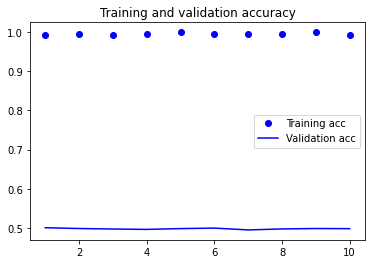

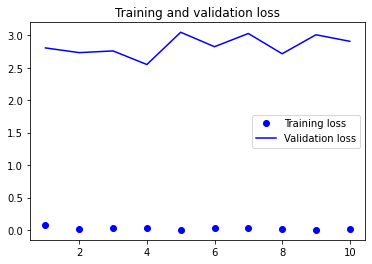

In [93]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of training samples. Validation accuracy has high variance for the same reason, but it seems to reach the high %50.

Note that your mileage may vary: because you have so few training samples, performance is heavily dependent on exactly which 200 samples you choose—and you’re choosing them at random. If this works poorly for you, try choosing a different random set of 200 samples, for the sake of the exercise (in real life, you don’t get to choose your training data).

You can also train the same model without loading the pretrained word embeddings and without freezing the embedding layer. In that case, you’ll learn a task--specific embedding of the input tokens, which is generally more powerful than pretrained word embeddings when lots of data is available. But in this case, you have only 200 training samples. 

In [94]:
#Training the same model without pretrained word embeddings

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
100/100 [==============================] - 1s 13ms/step - loss: 0.6948 - acc: 0.4869 - val_loss: 0.6938 - val_acc: 0.4932
Epoch 2/10
100/100 [==============================] - 1s 12ms/step - loss: 0.4614 - acc: 0.8963 - val_loss: 0

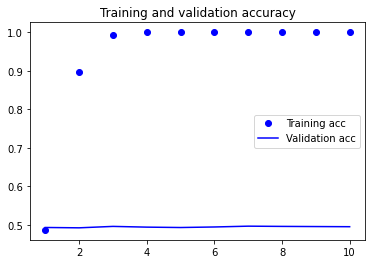

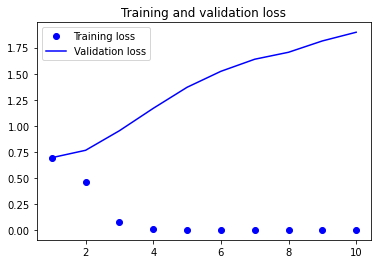

In [95]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy stalls in the low 50s. So in this case, pretrained word embeddings outperform jointly learned embeddings. If you increase the number of training samples, this will quickly stop being the case—try it as an exercise.

Finally, let’s evaluate the model on the test data. First, you need to tokenize the test data.

In [97]:
test_dir = '/content/drive/MyDrive/Colab_Notebooks/Deep_learning_for_text/aclImdb/test'

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [98]:
model.load_weights('/content/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 2.8746 - acc: 0.4956


[2.874631643295288, 0.49559998512268066]